#Introduction to Machine Learning
#Assignment 3
Group 12

Andrei Medesan (S5130727), Janan Jahed (S5107318), and Natalia Gayoso (S5221218)

##Part I - Curse of Example Dimensionality

The dimensionality curse refers to the complications and challenging problems that can emerge when working with data in high dimensions:

**1)** An example of this “curse” could be an image recognition and classification problem. For instance, consider the case in which we wanted to build a system that is able to recognize various objects in an image. Each image is high dimensional, as each of the pixel values in it is considered a dimension. The curse applies to this case because:


*   Processing the data, and analyzing the images would require high computational complexity (time and resource-wise). Additionally, for a model like this to work, you need a larger sample of different labelled images
*  The pixels/dimensions will be very different from each other, so the model will struggle to find patterns and be able to recognize objects accurately
*  The risk of noise is also increased in this case, as there will be many irrelevant pixel values/features (such as light changes) that do not provide information about the target objects, as the more dimensions there are, the more noise is created, and the higher the chance of recognizing an incorrect pattern/object. This problem could also, in turn, create an overfitting of the noise in the data.

**2)** Another example would be digital medicine databases (Berisha et al., 2021) this refers to all the data that is stored about a patient, with all the different possible relevant information that could be needed to give them proper treatment.


*   Since every patient represents a number of features, the high-dimensionality of different data leads to complications in the development of generalized models that are able to recognize patterns that can be applied to each patient individually and correctly.
*   In this case, there would be a sparsity problem, as there might not be enough relevant information about each patient for certain dimensions(features), limiting the model in making accurate predictions.
*   The risk of a higher amount of noise in the data also leads to overfitting, which can result in the learning of incorrect health-information patterns or even unseen, essential data that is wrongly categorized as noise.

##Part II - Cursed Featureless Birds

There are two possible steps that we can undertake when applying clustering. Each has its own advantages and disadvantages:

**1. Applying dimensionality reduction and then attempting to cluster the principal components.**

**Reasoning:** This technique can be very beneficial and can be thought of as a pre-processing step to reduce the dimensions into a manageable number resulting in a better clustering performance; especially since we are dealing with a large data set with many dimensions. This will eventually result in making it possible for humans to visualize it  (by capturing the most significant variance) and avoid computationally intractable processing. (Dr. Zullich et al., 2023)

**Possible issues:** However, we are getting rid of some parts of the data which means there will be some information missing and lost. Arguably, this can also affect the clustering performance by questioning the accuracy of the results. Moreover, since the chosen principal components are linear combinations of the original data (which itself can be hard to decide upon!!), it would make it complex to draw a conclusion on the raw data set and the independent variables would be harder to understand as a result. (Simplilearn, 2021)

**2. Clustering directly on raw data.**

**Reasoning:** This can be helpful since we are using all of our data without getting rid of any information on the data set, making the clustering results accurate. Moreover, if we were to use DBSCAN, it can handle different data sizes and shapes (Qi Xianting & Wang, 2016). Moreover, the clusters are a direct representation of the original features; thus the conclusion is easy to make.

**Possible issues:** Depending on the clustering strategy, high-dimensional data can be affected by the curse of dimensionality; making the algorithm inaccurate and inefficient as the clusters in the high-dimensional data are quite small and the conventional distance measures may not be efficient. Moreover, visualizing the clusters in a high-dimensional space is challenging and it can be hard to gain information about the result (GeeksforGeeks, 2022).


Since the data set consists of information about 100 birds with 150 features, it is considered to be a high-dimensional data set, making it complex to deal with when applying clustering directly to it. Hence we would need to apply dimensionality reduction to simplify the data slightly and thus obtain accurate results.


##Part III - Fun with Dimensionality Reduction

We selected the Iris dataset for this assignment to implement our models and perform the required tasks. The dataset was chosen from scikit-learn website (https://scikit-learn.org/stable/datasets.html) with all its characteristics.

###Libraries

The following libraries are used throughout all models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

###Load the dataset

We loaded the dataset and discarded the labels in order to focus solely on the features.

In [ ]:
iris = load_iris()

X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

###t-SNE model

The t-distributed Stochastic Neighbor Embedding (t-SNE) to the Iris dataset is implemented in the code below. The t-SNE is a technique employed for dimensionality reduction. The dataset initially comprises four dimensions, and t-SNE aims to reduce this high-dimensional space to two dimensions while preserving the structure of the data. To ensure consistency across executions, the code uses the Principal Component Analysis (PCA) initializer rather than "random," which would yield different scatter plots at each execution. Further on, we implemented the silhouette method as an evaluation of the metrics for clustering to observe how the model performs on the dataset (Dr. Zullich et al, 2023).

Silhouette Value: 0.69


Text(0.5, 1.0, 't_SNE Scatter Plot')

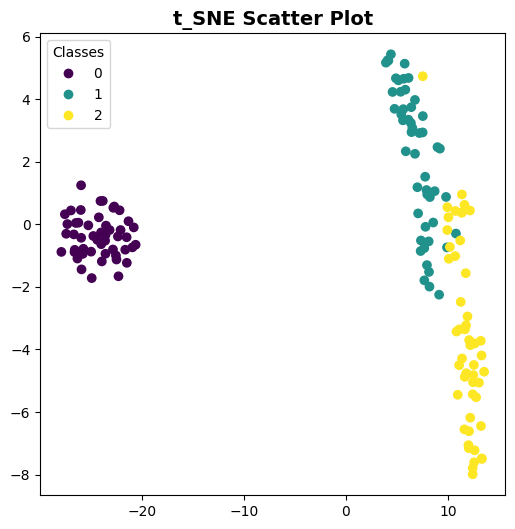

In [ ]:
# apply the t-SNE technique for 2 dimensions
tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X)

clusters = 3
kmeans = KMeans(n_clusters = clusters, n_init=10)
cluster_classes = kmeans.fit_predict(X_tsne)

# calculate silhouette score
silhouette_value = silhouette_score(X_tsne, cluster_classes)
print(f"Silhouette Value: {silhouette_value:.2f}")

# plot the resulting data
plt.figure(figsize=(6, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='viridis')
legend = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper left')
legend.get_title().set_fontsize(10)
plt.title("t_SNE Scatter Plot", fontsize=14, fontweight='bold')

###MDS model

Multi-Dimensional Scaling (MDS) applies a similar purpose of dimension reduction, yet employs a different technique by considering a matrix of pairwise dissimilarities between data points (Dr. Zullich et al, 2023). In the code below, the random initializer is set to 42 to maintain consistency across executions, and the high-dimensional dataset is effectively reduced to two dimensions. Additionally, the silhouette method is implemented to regard how the clusters are formed.

Silhouette Value: 0.58


Text(0.5, 1.0, 'MDS Scatter Plot')

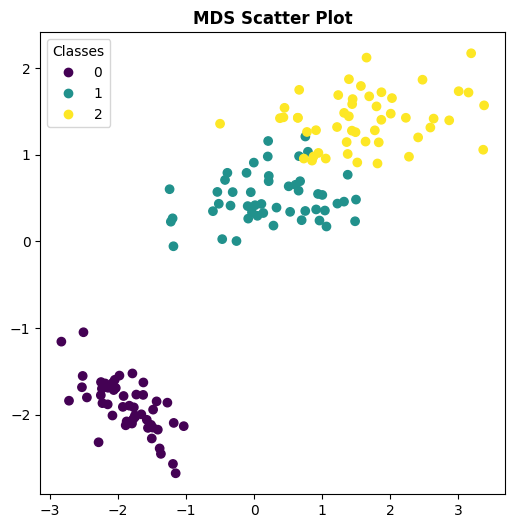

In [ ]:
# apply the MDS technique for 2 dimensions
mds = MDS(n_components=2, metric=True, n_init=4, max_iter=300, random_state=42, normalized_stress='auto')
X_mds = mds.fit_transform(X)

clusters = 3
kmeans = KMeans(n_clusters = clusters, n_init=10)
cluster_classes = kmeans.fit_predict(X_mds)

# Calculate silhouette score
silhouette_value = silhouette_score(X_mds, cluster_classes)
print(f"Silhouette Value: {silhouette_value:.2f}")

# plot the resulting data
plt.figure(figsize=(6, 6))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=iris.target, cmap='viridis')
legend = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper left')
legend.get_title().set_fontsize(10)
plt.title("MDS Scatter Plot", fontsize=12, fontweight='bold')

###Autoencoder

The code below illustrates the implementation of an autoencoder on the Iris dataset. It employs a neural network-based technique for dimensionality reduction. To ensure reproducibility, we implemented random seeds that are set to 0. The autoencoder efficiently reduces the high-dimensional space of the Iris dataset to two dimensions through a neural network architecture (Dr. Valdenegro, 2023) consisting of two layers: an encoder with 2 nodes and a decoder with 4 nodes. The mean squared error (MSE) loss function and the Adam optimizer (with a learning rate of 0.001) are used in the model creation. Following, the dataset is loaded, discarding the labels (y-axis) and focusing solely on the features (x). A train-test split is performed with a test size of 20%, and a random state of 1 to ensure consistency. The early stopping method is applied to interrupt the code's execution when the validation loss starts to increase (Browniee, 2020). In this way, the code ensures that the model does not overfit. Our model is trained over 100 epochs and uses a batch size of 256. In this way, we ensure that the model converges to a good solution while speeding up the training by processing more data at once. In the autoencoder’s training, we allocate 10% to the validation set, monitoring the model's performance on unseen data during training.

The code generates two plots, one scatter plot, showing the reduced dimensionality of the data, and one showing the training and validation loss to observe whether the model overfits or not. Moreover, the autoencoder was executed multiple times for training to ensure the successful reduction of dimensions for the dataset.

In [ ]:
import keras
import tensorflow as tf
from keras import layers
from sklearn.preprocessing import MinMaxScaler

Test Loss: 0.0619
Silhouette Value: 0.55
5/5 [==============================] - 0s 3ms/step


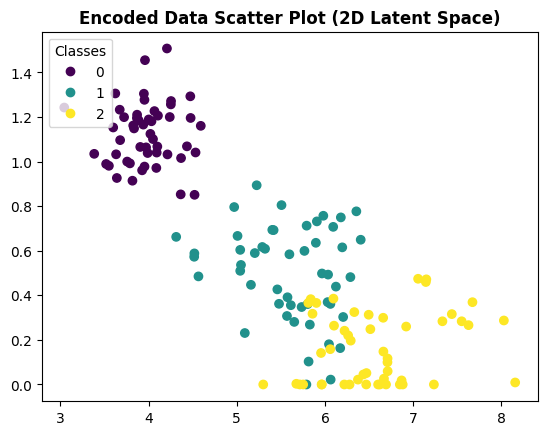

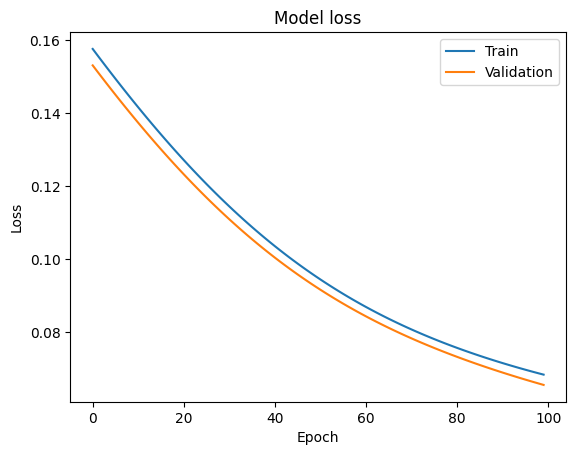

In [ ]:
# The code was developed using the information found on Building "Autoencoders in Keras" (Chollet, 2016)
def train_autoencoder():
  # set random seeds for reproducibility
  np.random.seed(0)
  tf.random.set_seed(0)

  # variables for the current data dimensions and the reduced dimensions
  input_dimensions = 4
  encoding_dimensions = 2

  # layers of the neural network used
  input_layer = keras.Input(shape=(input_dimensions,))
  encoded = keras.layers.Dense(encoding_dimensions, activation='relu')(input_layer)
  decoded = keras.layers.Dense(input_dimensions, activation='relu')(encoded)

  # creating the model - autoencoder, encoder and the decoder
  autoencoder = keras.Model(input_layer, decoded)
  encoder = keras.Model(input_layer, encoded)
  encoded_input = keras.Input(shape=(encoding_dimensions,))
  decoder_layer = autoencoder.layers[-1]
  decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

  # the model uses the adam optimizer and the MSE loss
  autoencoder.compile(loss='mean_squared_error', optimizer='adam')

  # load the iris dataset, train it and normalize the data
  iris = load_iris()
  X = iris.data
  X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=1)
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # early stopping implementation to interrupt the process when the validation declines
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

  # train the autoencoder
  history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_split=0.1, verbose=0, callbacks=[early_stopping])

  # evaluate the autoencoder on the test data
  test_loss = autoencoder.evaluate(X_test, X_test, verbose=0)
  print(f"Test Loss: {test_loss:.4f}")

  clusters = 3
  kmeans = KMeans(n_clusters = clusters, n_init=10)
  cluster_classes = kmeans.fit_predict(X_test)

  # Calculate silhouette score
  silhouette_value = silhouette_score(X_test, cluster_classes)
  print(f"Silhouette Value: {silhouette_value:.2f}")

  # plot the encoded data
  encoded_data = encoder.predict(X)
  scatter = plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=iris.target)
  legend = plt.legend(*scatter.legend_elements(), title="Classes", loc='upper left')
  legend.get_title().set_fontsize(10)
  plt.title('Encoded Data Scatter Plot (2D Latent Space)', fontsize=12, fontweight='bold')
  plt.show()

  # plot the training and validation loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

train_autoencoder()

##Comparing the three models

The Iris dataset contains three classes — Iris-Setosa (class 0), Iris-Versicolour (class 1), and Iris-Virginica (class 2) — that can be observed in the legend of each scatter plot.
In the t-SNE scatter plot, the clusters of Iris-Versicolour and Iris-Virginica present some overlap, with one class partially embedding within the other, while Iris-Setosa remains separated. The silhouette score obtained is 0.69, which shows a good clustering quality.

The scatter plot generated by MDS shows a clustering pattern similar to that observed with t-SNE. Specifically, Iris-Versicolour and Iris-Virginica continue to appear close to each other, while Iris-Setosa remains separated. However, the silhouette score for MDS is reported as 0.58, which presents a good-quality clustering. Comparing the two models, t-SNE performs better regarding the silhouette scores and visualizing the clusters.

The scatter plot produced by the autencoder can vary at each iteration. However, it presents the clusters either linearly, separately or overlapping each other. The silhouette score for the autoencoder in all plots generated is reported as 0.55, reflecting a good cluster quality. Comparing the autoencoder with the other models, it performs the last in the ranking in terms of cluster quality.

In other words, t-SNE, MDS, and the autoencoder all serve the purpose of dimensionality reduction, each with its unique approach and characteristics. When comparing the three techniques, t-SNE yields the highest silhouette score (0.69), indicating better-defined clusters, followed by MDS (0.58) and the autoencoder (0.55).

##References:

Berisha, V., Krantsevich, C., Hahn, P. R., Hahn, S., Dasarathy, G., Turaga, P., & Liss, J. (2021). Digital medicine and the curse of dimensionality. Npj Digital Medicine, 4(1). https://doi.org/10.1038/s41746-021-00521-5

Browniee, J. (2020). Use Early Stopping to Halt the Training of Neural Networks At the Right Time. *Deep Learning Performance*. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

Cardenas, J. D., M. Sc., Dr. Valdenegro, M. & Dr. Sburlea, A. (2023). Introduction to Machine Learning (for AI) — Regularization. *University of Groningen*. https://brightspace.rug.nl//content/enforced/243058-WBAI056-05.2023-2024.1/lecture10_regularization.pdf?_&d2lSessionVal=VEJzgLKjuXEOEGWseFPJ8g8qV&ou=243058

Chollet, F. (2016). Building Autoencoders in Keras. *The Keras Blog*. https://blog.keras.io/building-autoencoders-in-keras.html

Dr. Valdenegro, M. (2023). Introduction to Machine Learning (for AI) — Unsupervised Learning II. *University of Groningen*. https://brightspace.rug.nl//content/enforced/243058-WBAI056-05.2023-2024.1/lecture13_unsupervised_learning_II.pdf?_&d2lSessionVal=VEJzgLKjuXEOEGWseFPJ8g8qV&ou=243058

Dr. Zullich, M., Dr. Sburlea, A. & Dr. Valdenegro, M. (2023). Introduction to Machine Learning (for AI) — Unsupervised Learning I. *University of Groningen*. https://brightspace.rug.nl//content/enforced/243058-WBAI056-05.2023-2024.1/lecture12_unsupervised_learning_I.pdf?_&d2lSessionVal=VEJzgLKjuXEOEGWseFPJ8g8qV&ou=243058

GeeksforGeeks. (2022). Clustering high dimensional data in data mining. https://www.geeksforgeeks.org/clustering-high-dimensional-data-in-data-mining/

Simplilearn. (2021). What is Dimensionality Reduction? Overview, and Popular Techniques. *Simplilearn*. https://www.simplilearn.com/what-is-dimensionality-reduction-article

Qi Xianting, & Wang, P. (2016). A Density-Based Clustering Algorithm for High-Dimensional Data with Feature Selection. *2016 International Conference on Industrial Informatics - Computing Technology, Intelligent Technology, Industrial Information Integration (ICIICII)*. https://doi.org/10.1109/iciicii.2016.0038

‌